## Python Exercise

This is the online version of Sanvi's code

In [312]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os 
import sys
from scipy.stats import expon

### Returns Vector of size a

In [313]:
def vector_generator(a,distype):
    arr = np.zeros(a)
    if (distype == 'binary'):
        arr[:a//2] = 1
        np.random.shuffle(arr)
    elif (distype == 'expon'):
        arr = expon.rvs(scale=1,loc=0,size=a)
    else:
        print('invalid type value')
    print(arr)
    return arr
    

### Returns r x c Matrix of different types of distributions

In [316]:
def matrix_generator(row, column, distype, shape=0, scale=0):
    if (distype == 'random'):
        a = np.random.rand(row, column)
    elif (distype == 'uniform'):
        a = np.random.uniform(0, 25, row*column)
        a = a.reshape(row, column)
    elif (distype == 'gaussian'):
        a = np.random.normal(size=(row,column))
    elif (distype == 'exponential'):
        a = np.random.exponential(size=(row,column))
    elif (distype == 'gamma'):
        a = np.random.gamma(shape, scale, row*column)
        a = a.reshape(row, column)
    else:
        print('invalid type value')
        
    print(a)
    return a

### Returns Matrix Multiplication of Vector of size a and Matrix of size a x b

In [317]:
def matmul(a, b, distype, shape=2, scale=3):
    return vector_generator(a, 'binary') @ matrix_generator(a, b, distype, shape, scale)

### Output

In [324]:
a = 8;
b = 20;
c = matmul(a,b,'gaussian');

[0. 1. 1. 0. 0. 1. 0. 1.]
[[-2.30046157e-01  1.51526889e+00  3.24080502e-01 -1.13797669e-03
   2.35564697e-01  1.43502358e+00 -5.40361404e-01 -1.12056658e+00
  -6.90940105e-01  1.62209344e+00 -1.47033610e-01  1.45097722e+00
   8.70573237e-01  8.05392462e-01 -3.34759584e-01 -1.09783191e+00
   2.21659629e+00  2.66055819e+00 -1.70637802e+00 -2.83479713e-01]
 [-1.14118097e-01  1.24891484e-01  1.85283142e+00 -4.97831609e-01
  -9.61101832e-01 -1.30069336e+00  1.42521052e-01 -1.20811849e+00
   7.46991109e-01 -6.37542943e-01  8.51846174e-01 -4.42315992e-01
   1.68507703e+00 -7.76016519e-01  5.99773429e-01 -8.01769473e-01
  -9.68465165e-01 -7.62516444e-01 -8.92090031e-01  4.84175142e-01]
 [-9.41734811e-01  3.19312105e-01  7.03749585e-01  1.54115981e+00
   8.59242879e-01 -4.38818643e-01  7.21448124e-01 -1.45637118e+00
  -1.32630302e+00  1.56183896e+00 -2.37725384e+00  2.19930428e-01
   3.89433862e-01  2.12806162e-01  8.73830521e-01  2.58001767e-01
   4.39441158e-01  1.28671335e+00 -7.02233713e-0

In [325]:
##print(c)

In [326]:
c[c<0]=0
d = c.copy()
APL = c.sum()
print(APL)
print(c)
print(d)

11.441207997528215
[0.         0.         2.20688755 0.1026617  0.         0.
 1.63707569 0.         0.         1.66621044 0.         0.41945844
 2.57652364 0.         0.85080353 0.         0.         1.19768677
 0.         0.78390024]
[0.         0.         2.20688755 0.1026617  0.         0.
 1.63707569 0.         0.         1.66621044 0.         0.41945844
 2.57652364 0.         0.85080353 0.         0.         1.19768677
 0.         0.78390024]


[-2.2882416 -2.2882416 -2.2882416 -2.2882416 -2.2882416 -2.2882416
 -2.2882416 -2.2882416 -2.2882416 -2.2882416 -2.2882416 -2.2882416
 -2.2882416 -2.2882416 -2.2882416 -2.2882416 -2.2882416 -2.2882416
 -2.2882416 -2.2882416]
[1.         0.96254116 0.92508232 0.88762348 0.85016464 0.8127058
 0.77524696 0.73778812 0.70032928 0.66287044 0.6254116  0.58795276
 0.55049392 0.51303508 0.47557624 0.4381174  0.40065856 0.36319972
 0.32574088 0.28828204]
20
range(1, 21)


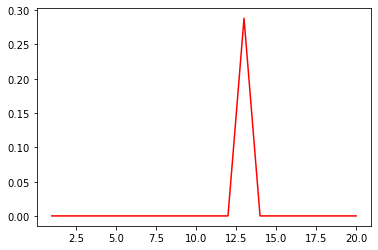

In [327]:
constant= 0.2
m = len(c)
##c = np.array([x - APL*constant for x in c])
for i in range(m):
    c[i] = c[i] - APL*constant
print(c-d)
c[c<0]=0
x = np.linspace(1,max(c), m)
print(x)
print(m)
x = range(1,m+1)
print(x)
plt.plot(x,c,"r-")
plt.show()

In [331]:
np.count_nonzero(c) / len(c)


0.05

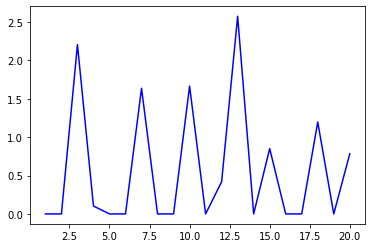

In [328]:
plt.plot(x,d,"b-")
plt.show()

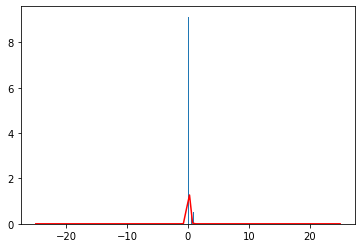

In [323]:
mean, var = sp.stats.distributions.norm.fit(c)
x = np.linspace(-25,25,100)
fitted_data = sp.stats.distributions.norm.pdf(x, mean, var)
plt.hist(c, density=True)
plt.plot(x,fitted_data,'r-')